# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



df = pd.read_csv('../input/ionosphere-data/ionosphere_data.csv')

In [2]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

we have 34 features, all are numerical.

# Checking Missing Values

In [4]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

There is no missing data, so there is no need for handling missing data.

# Shuffling Data

Shuffling of data is important to break any bias during training, for example, without shuffling it is possible that 70% training data is 'g' and 30% is 'b' etc

In [5]:
from sklearn.utils import shuffle

df = shuffle(df)

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.76296,-0.07778,1.00000,-0.29630,1.00000,-0.85741,0.80000,0.06111,0.45556,-0.42778,1.00000,-0.12581,1.00000,-0.83519,0.49259,0.01852,0.82222,-0.05926,0.98215,-0.19938,1.00000,0.22037,0.69630,-0.26481,0.92148,-0.24549,0.78889,0.02037,0.87492,-0.27105,1.00000,-0.57037,g
1,1,0,0.32834,0.02520,0.15236,0.21278,0.14919,0.74003,-0.25706,0.92324,-0.10312,0.19380,-0.61352,0.25786,-0.94053,-0.05409,-0.13117,-0.14329,-0.30315,-0.44615,-0.11409,-0.85597,0.02668,-0.22786,0.27942,-0.06295,0.33737,-0.11876,0.27657,-0.11409,0.15078,0.13296,0.12197,0.20468,g
2,1,0,0.96933,0.00876,1.00000,0.00843,0.98658,-0.00763,0.97868,-0.02844,0.99820,-0.03510,1.00000,-0.01271,1.00000,-0.02581,1.00000,-0.01175,0.98485,0.00025,1.00000,-0.02612,1.00000,-0.04744,0.96019,-0.04527,0.99188,-0.03473,0.97020,-0.02478,1.00000,-0.03855,0.98420,-0.04112,g
3,1,0,0.57647,-0.01569,0.40392,0.00000,0.38431,0.12941,0.40000,-0.05882,0.56471,0.14118,0.46667,0.08235,0.52549,-0.05490,0.58039,0.01569,0.50196,0.00000,0.45882,0.06667,0.58039,0.08235,0.49804,0.00392,0.48601,0.10039,0.46275,0.08235,0.45098,0.23529,0.43137,0.17255,g
4,1,0,0.72727,-0.05000,0.89241,0.03462,1.00000,0.72727,0.66364,-0.05909,0.48182,-0.16818,0.81809,0.09559,0.56818,1.00000,0.50455,0.21818,0.66818,0.10000,1.00000,-0.30000,0.98636,-1.00000,0.57273,0.32727,0.56982,0.14673,0.42273,0.08182,0.48927,0.14643,1.00000,1.00000,b


# Splitting Data

we have to split the dataset in 60-40.

In [8]:
df.shape

(351, 35)

In [9]:
train_data = df.iloc[0:210, 0:-1]
train_targets = df.iloc[0:210, -1]

test_data = df.iloc[210:, 0:-1]
test_targets = df.iloc[210:, -1] 

In [10]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(210, 34)
(210,)
(141, 34)
(141,)


In [11]:
train_targets.head()

0    g
1    g
2    g
3    g
4    b
Name: label, dtype: object

# Standardize the Input Variables
Hint: Centeralized the data

By looking at the data, feature 1 and feature 2 seem to be binary features. Standardization/ Normalization has no effect on binary features.
Also, it may result in NaN values. For example, feature 2 results in NaN values afer normalization

In [12]:
df['feature1'].value_counts()

1    313
0     38
Name: feature1, dtype: int64

In [13]:
df['feature2'].value_counts()

0    351
Name: feature2, dtype: int64

### A little bit of feature engineering: Feature 2 has only 1 value (0), which is not very helpful in predictions. So it can be dropped.

In [14]:
train_data.drop('feature2', inplace=True, axis=1)

## Note: We have to do the same transformations (dropping, replacing etc) on test data that we do in training data

In [15]:
test_data.drop('feature2', inplace=True, axis=1)

In [16]:
# if we normalize targets too then we will predict normalized values which will need inverse normalization

mean = train_data.mean()
std = train_data.std()

train_data-=mean
train_data/=std

test_data-=mean
test_data/=std


In [17]:
train_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,0.323669,0.223230,-0.284637,0.755095,-0.839376,0.903591,-1.852048,0.537387,-0.253388,-0.057597,-1.150058,0.938054,-0.466673,0.969646,-1.931382,0.198629,0.020936,0.691728,-0.051061,1.041737,-0.376908,1.049986,0.501582,0.497764,-0.381615,0.727473,-0.440900,0.666004,0.038324,0.877895,-0.580883,1.204640,-1.258329
1,0.323669,-0.643325,-0.052353,-0.856890,0.235152,-0.793812,1.133523,-1.485035,1.523004,-1.042061,0.097751,-1.592659,0.324972,-1.948577,-0.243672,-0.801549,-0.305129,-1.116278,-0.798750,-0.743738,-1.640646,-0.555647,-0.342962,-0.224660,0.017259,-0.399248,-0.210037,-0.245320,-0.223047,-0.421685,0.194600,-0.445022,0.321312
2,0.323669,0.634695,-0.089435,0.755095,-0.196174,0.876817,-0.263832,0.879247,-0.437903,0.898603,-0.361761,0.938054,-0.233308,0.969646,-0.182568,1.012243,-0.040061,0.953007,0.063946,1.070810,-0.043435,1.049986,-0.003019,0.955067,0.052194,0.863271,-0.056961,0.988521,-0.049442,1.102371,-0.134607,1.174954,-0.179656
3,0.323669,-0.148598,-0.144585,-0.378490,-0.213968,-0.324737,-0.007709,-0.227913,-0.500500,0.134739,-0.007883,0.101557,-0.037166,0.256065,-0.245422,0.339413,0.015233,0.177202,0.063463,0.189375,0.135158,0.357778,0.241528,0.154194,0.149393,-0.112528,0.189185,0.085861,0.158804,0.117070,0.391019,0.136285,0.255828
4,0.323669,0.152070,-0.221976,0.550487,-0.140894,0.903591,1.109675,0.276496,-0.501056,-0.011323,-0.628917,0.652739,-0.009847,0.320263,2.033882,0.217806,0.423273,0.444249,0.256719,1.070810,-0.570571,1.027485,-1.797811,0.283626,0.788331,0.049137,0.273602,0.014672,0.157774,0.185787,0.220455,1.204640,1.942267


In [18]:
test_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
210,-3.074860,-3.291798,2.146431,-1.146638,-0.213968,-1.091452,-0.249572,-2.906466,1.681165,0.901775,1.716181,-0.630388,-0.207083,-0.534182,-0.126801,1.012243,-2.031494,-2.235829,1.996026,1.07081,1.931538,-0.599659,0.086366,-2.441805,-1.834346,0.878934,-1.815380,1.041530,1.942584,-2.486936,1.858854,-0.674182,-0.095849
211,0.323669,0.695845,-2.364820,0.755095,1.896758,0.903591,1.619400,0.920038,-1.409537,0.901775,1.716181,0.938054,1.856267,0.969646,2.033882,-0.591223,-0.016384,0.977347,1.996026,1.07081,1.931538,1.049986,-1.797811,1.024055,2.117641,0.878934,1.144860,1.041530,-1.459165,-2.038272,1.858854,1.204640,1.942267
212,0.323669,-3.291798,-2.364820,0.755095,1.896758,0.903591,-0.518237,-0.993214,-0.379303,-2.622476,1.716181,0.938054,1.856267,-0.264741,-2.287484,-2.194688,-2.031494,-0.488665,-1.869100,1.07081,-1.917861,-2.249304,1.970543,-2.441805,-1.834346,0.878934,-1.815380,-2.516104,-1.945130,1.102371,1.858854,-0.674182,-0.095849
213,0.323669,0.021156,-2.364820,0.755095,1.896758,0.903591,-1.507783,0.554473,-1.212680,0.901775,-2.298779,0.938054,-2.051202,0.969646,1.458989,-0.309189,1.413982,0.977347,1.571558,1.07081,1.647991,1.049986,-1.797811,1.024055,1.828296,0.878934,-0.149831,0.970057,-0.705921,1.102371,1.192185,1.204640,0.612029
214,0.323669,0.695845,-0.258156,0.755095,1.114460,0.903591,-0.070955,0.920038,0.038560,0.901775,-2.298779,0.938054,-1.043957,0.969646,-0.469291,1.012243,0.082256,0.977347,-1.125798,1.07081,-0.504612,1.049986,-1.797811,1.024055,-1.005259,0.878934,-1.476036,1.041530,-1.945130,1.102371,-1.568448,1.204640,-1.079281


In [19]:
pd.options.display.float_format = '{:.4f}'.format

In [20]:
train_data.mean()[0:5]

feature1   -0.0000
feature3    0.0000
feature4    0.0000
feature5   -0.0000
feature6   -0.0000
dtype: float64

In [21]:
train_data.std()[0:5]

feature1   1.0000
feature3   1.0000
feature4   1.0000
feature5   1.0000
feature6   1.0000
dtype: float64

# Encode labels

In [24]:
train_targets = train_targets.map({'g':1, 'b':0})

In [25]:
train_targets.head()

0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [26]:
test_targets = test_targets.map({'g':1, 'b':0})

In [27]:
test_targets.head()

210    0
211    0
212    0
213    0
214    1
Name: label, dtype: int64

# Model : 1 hidden layers including 16 units

In [201]:
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(16, input_shape=(train_data.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation Step 
(Note : Its a Binary problem , select loss , metrics according to it)

In [202]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model with Epochs (100)

In [203]:
# import numpy as np

# train_targets = np.asarray(train_targets).astype('float32').reshape((-1,1))
# test_targets = np.asarray(test_targets).astype('float32').reshape((-1,1))

In [204]:
history = model.fit(train_data, train_targets, validation_split=0.2, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 47ms/step - loss: 1.0396 - accuracy: 0.4106 - val_loss: 1.0070 - val_accuracy: 0.3810
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.9991 - accuracy: 0.4792 - val_loss: 0.9812 - val_accuracy: 0.5714
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.9679 - accuracy: 0.6589 - val_loss: 0.9583 - val_accuracy: 0.7381
Epoch 4/500
6/6 [==============================] - 0s 11ms/step - loss: 0.9401 - accuracy: 0.7799 - val_loss: 0.9381 - val_accuracy: 0.7857
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.9301 - accuracy: 0.7630 - val_loss: 0.9212 - val_accuracy: 0.8095
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.9060 - accuracy: 0.7611 - val_loss: 0.9054 - val_accuracy: 0.8333
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 0.8883 - accuracy: 0.8126 - val_loss: 0.8898 - val_accuracy: 0.8333
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 11ms/step - loss: 0.2829 - accuracy: 0.9647 - val_loss: 0.5071 - val_accuracy: 0.8571
Epoch 60/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2887 - accuracy: 0.9480 - val_loss: 0.5024 - val_accuracy: 0.8571
Epoch 61/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2783 - accuracy: 0.9655 - val_loss: 0.5007 - val_accuracy: 0.8571
Epoch 62/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2723 - accuracy: 0.9748 - val_loss: 0.4963 - val_accuracy: 0.8333
Epoch 63/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2735 - accuracy: 0.9626 - val_loss: 0.4924 - val_accuracy: 0.8333
Epoch 64/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2721 - accuracy: 0.9664 - val_loss: 0.4857 - val_accuracy: 0.8333
Epoch 65/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2836 - accuracy: 0.9543 - val_loss: 0.4788 - val_accuracy: 0.8571
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 11ms/step - loss: 0.1492 - accuracy: 0.9803 - val_loss: 0.3830 - val_accuracy: 0.9048
Epoch 118/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1444 - accuracy: 0.9885 - val_loss: 0.3830 - val_accuracy: 0.9048
Epoch 119/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1446 - accuracy: 0.9859 - val_loss: 0.3827 - val_accuracy: 0.9048
Epoch 120/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1387 - accuracy: 0.9900 - val_loss: 0.3821 - val_accuracy: 0.9048
Epoch 121/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1434 - accuracy: 0.9863 - val_loss: 0.3823 - val_accuracy: 0.9048
Epoch 122/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1443 - accuracy: 0.9852 - val_loss: 0.3824 - val_accuracy: 0.9048
Epoch 123/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1471 - accuracy: 0.9818 - val_loss: 0.3807 - val_accuracy: 0.9048
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0940 - accuracy: 0.9926 - val_loss: 0.4212 - val_accuracy: 0.8810
Epoch 176/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0906 - accuracy: 1.0000 - val_loss: 0.4171 - val_accuracy: 0.8810
Epoch 177/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0907 - accuracy: 1.0000 - val_loss: 0.4195 - val_accuracy: 0.8810
Epoch 178/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0922 - accuracy: 0.9948 - val_loss: 0.4239 - val_accuracy: 0.9048
Epoch 179/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0922 - accuracy: 0.9881 - val_loss: 0.4279 - val_accuracy: 0.9048
Epoch 180/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0896 - accuracy: 0.9948 - val_loss: 0.4320 - val_accuracy: 0.9048
Epoch 181/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0909 - accuracy: 0.9963 - val_loss: 0.4321 - val_accuracy: 0.9048
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy: 0.9048
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0658 - accuracy: 1.0000 - val_loss: 0.4788 - val_accuracy: 0.9048
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 0.4834 - val_accuracy: 0.9048
Epoch 236/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0678 - accuracy: 1.0000 - val_loss: 0.4799 - val_accuracy: 0.9048
Epoch 237/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0666 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9048
Epoch 238/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.9048
Epoch 239/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.4615 - val_accuracy: 0.8810
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 0.4953 - val_accuracy: 0.9048
Epoch 292/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0503 - accuracy: 1.0000 - val_loss: 0.4863 - val_accuracy: 0.9048
Epoch 293/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0507 - accuracy: 1.0000 - val_loss: 0.4899 - val_accuracy: 0.9048
Epoch 294/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0494 - accuracy: 1.0000 - val_loss: 0.4972 - val_accuracy: 0.8810
Epoch 295/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.4844 - val_accuracy: 0.9048
Epoch 296/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0495 - accuracy: 1.0000 - val_loss: 0.4791 - val_accuracy: 0.9048
Epoch 297/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0500 - accuracy: 1.0000 - val_loss: 0.4820 - val_accuracy: 0.9048
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.4990 - val_accuracy: 0.8810
Epoch 350/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.5089 - val_accuracy: 0.8810
Epoch 351/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.5928 - val_accuracy: 0.7619
Epoch 352/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.5321 - val_accuracy: 0.8810
Epoch 353/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.5054 - val_accuracy: 0.9048
Epoch 354/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.5146 - val_accuracy: 0.9048
Epoch 355/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.5194 - val_accuracy: 0.9048
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.5548 - val_accuracy: 0.8571
Epoch 408/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0339 - accuracy: 1.0000 - val_loss: 0.5406 - val_accuracy: 0.8571
Epoch 409/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.5354 - val_accuracy: 0.8333
Epoch 410/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0339 - accuracy: 1.0000 - val_loss: 0.5446 - val_accuracy: 0.8333
Epoch 411/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.5818 - val_accuracy: 0.8333
Epoch 412/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.5600 - val_accuracy: 0.8571
Epoch 413/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.5536 - val_accuracy: 0.8810
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.5745 - val_accuracy: 0.8333
Epoch 466/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.5904 - val_accuracy: 0.8333
Epoch 467/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.5696 - val_accuracy: 0.8333
Epoch 468/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.5647 - val_accuracy: 0.8571
Epoch 469/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.5799 - val_accuracy: 0.8333
Epoch 470/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.8333
Epoch 471/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.5781 - val_accuracy: 0.8333
Epoch 

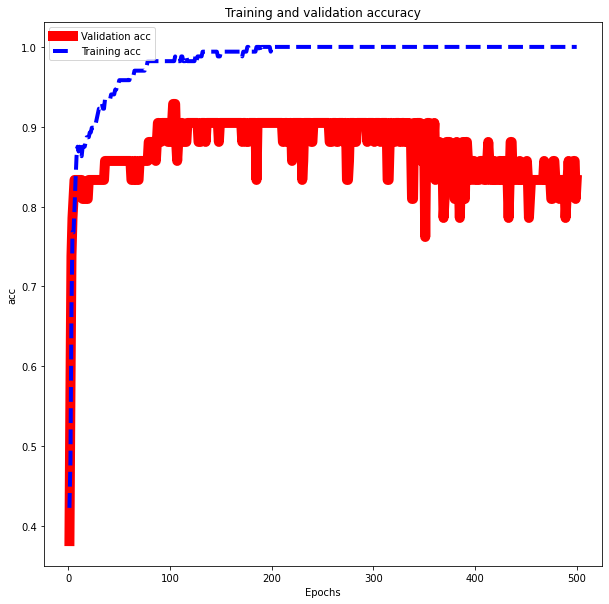

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss, 'r', label='Validation acc', linewidth=10)
plt.plot(epochs, loss, 'b--', label='Training acc', linewidth=4)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need 

# Prediction should be > 92%

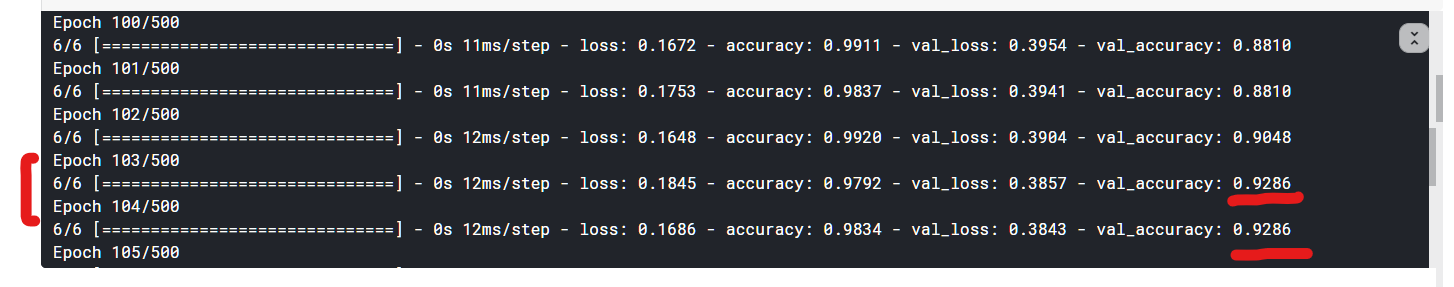

model hits 92.8% accuracy on 103 epochs

# Final Model

In [217]:
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(16, input_shape=(train_data.shape[1],), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_targets, validation_split=0.2, epochs=103)

Epoch 1/103
6/6 [==============================] - 1s 46ms/step - loss: 1.0528 - accuracy: 0.5777 - val_loss: 0.9997 - val_accuracy: 0.6429
Epoch 2/103
6/6 [==============================] - 0s 11ms/step - loss: 1.0103 - accuracy: 0.6460 - val_loss: 0.9644 - val_accuracy: 0.6667
Epoch 3/103
6/6 [==============================] - 0s 11ms/step - loss: 0.9731 - accuracy: 0.6192 - val_loss: 0.9402 - val_accuracy: 0.6667
Epoch 4/103
6/6 [==============================] - 0s 11ms/step - loss: 0.9558 - accuracy: 0.6404 - val_loss: 0.9206 - val_accuracy: 0.6667
Epoch 5/103
6/6 [==============================] - 0s 11ms/step - loss: 0.9402 - accuracy: 0.6096 - val_loss: 0.9037 - val_accuracy: 0.6667
Epoch 6/103
6/6 [==============================] - 0s 11ms/step - loss: 0.8994 - accuracy: 0.6543 - val_loss: 0.8876 - val_accuracy: 0.6667
Epoch 7/103
6/6 [==============================] - 0s 11ms/step - loss: 0.8823 - accuracy: 0.6418 - val_loss: 0.8734 - val_accuracy: 0.6429
Epoch 8/103
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.2467 - accuracy: 0.9920 - val_loss: 0.5147 - val_accuracy: 0.8571
Epoch 60/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2481 - accuracy: 0.9937 - val_loss: 0.5126 - val_accuracy: 0.8571
Epoch 61/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2491 - accuracy: 0.9874 - val_loss: 0.5103 - val_accuracy: 0.8571
Epoch 62/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2480 - accuracy: 0.9911 - val_loss: 0.5086 - val_accuracy: 0.8571
Epoch 63/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2487 - accuracy: 0.9844 - val_loss: 0.5014 - val_accuracy: 0.8571
Epoch 64/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2460 - accuracy: 0.9851 - val_loss: 0.4990 - val_accuracy: 0.8571
Epoch 65/103
6/6 [==============================] - 0s 11ms/step - loss: 0.2517 - accuracy: 0.9829 - val_loss: 0.4987 - val_accuracy: 0.8571
Epoch 66/103
6/6 [========

# Evaluation Step

In [218]:
model.evaluate(test_data, test_targets)

5/5 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.9291


[0.32347896695137024, 0.9290780425071716]

# Prediction Step

In [219]:
predictions = model.predict(test_data)

In [220]:
len(predictions)

141

In [221]:
import numpy as np

In [222]:
pd.DataFrame({'Actual':test_targets, 'Predicted':np.round(predictions.reshape(141,))})

,Actual,Predicted
210,0,0.0000
211,0,0.0000
212,0,0.0000
213,0,0.0000
214,1,1.0000
215,0,0.0000
216,1,1.0000
217,1,1.0000
218,0,0.0000
219,0,1.0000
